# Unsupervised Learning

# 1. Introduction

The aim of this notebook is to explore a few unsupervised learning methods and explore some uses cases of clustering algorithm.

# 2. What Is Unsupervised Learning

The main differenece between supervised and unsupervised learning is that in unsupervised learning, the datasets do not have labels (a.k.a target to predict in supervised learning).

Unsupervised learning aims to categories groups of data that has high degree of similarity and put them into their clusters. And then the data scientist or machine learning engineer comes in to assign the category labels.

# 3. Limitation of Unsupervised Learning

There is no real labels for us to really be sure that the categorised data points are indeed an accurate representation of the reality. Hence, the results of unsupervised learning are often subjective as we do not have the real answers.

# 4. Example of Unsupervised Learning

A Relationship Manager uses clustering algorithm to cluster a few groups within their database of customer. Depending on the results of the clusters, the Relationship Manager decides to push out different investment products to their customer which are suitable for them.

E.g. Younger customers who have mid income salary is able to afford high risk products or dlder customers who have high income can opt for dividend products of lower risk.

# 5. Goals of Clustering

Objectives to achieve distinct clustering:
1. Points in the same cluster have a small distance from one another (minimize this distance).
2. Different clusters have a large distance from one another (maximise this distance).

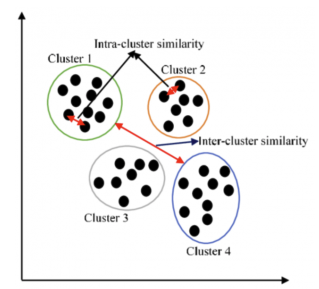

# 6. Type of Clustering Algorithm
<b>1. K-Means Clustering (Centroids-based Clustering)</b><br>
<b>2. Hierarchical Clustering (Connectivity-based Clustering)</b><br>
3. Density-based Clustering

## 6.1 K-means Clustering (Centroids-based Clustering)

This is a centroids-based or distance-based algorithm <b>(scale your data!)</b> where we calculate the distances to assign a point to a cluster. Each cluster has its on centroids.

Scaling algorithm can be standardization (recommended) or min max scaling.

### 6.1.1 Concepts of K-means Clustering 

Steps for the K-means algorithm:
1. Choose no. of k (clusters).
2. Select k random points from the data as centroids.
3. Assign all points to the cloest cluster centroids.
4. Recompute the centroids of newly formed clusters.
5. Repeat step 3 and 4.

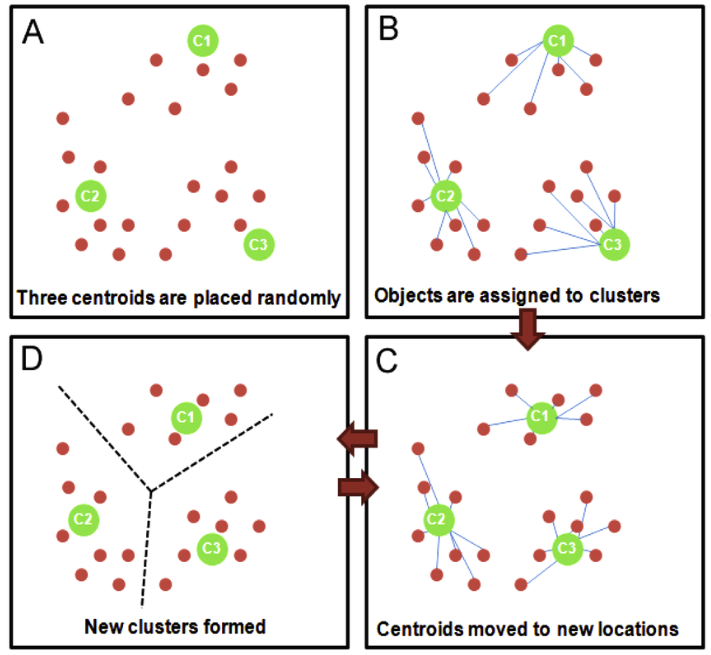

A: Choose k =3. Select 3 centroids (C1, C2, C3) and place then randomly within the data.<br>
B: From here C1, C2, C3 are assigned to the closest clusters.<br>
C. Originally, centroids randomly chosen are in the middle of nowhere and since it is the 1st iteration, randomly chosen opints are allow to make mistakes. New centroids is calculated using all points in the cluster to triangulate to the centermost position of the cluster.<br>
D. After many iterative calculation and there are no more new assignments points, the algorithm has converged and cluster membership of the centroids do not change.
    
    

### 6.1.2 Stop Criteria for K-means

1. Centroids of newly formed clusters do not change.
2. After many iterations, cluster membership do not change for majority of the points
3. Maximum number of iterations are reached. If no clusters are formed after maximum iterations are reached, final centroids will move to the correct positions (this is state where the Within-Cluster Sum of Squares has hit the local optimum and is at its lowest possible).

### 6.1.3 Within-Clusters Sum of Squares (WCSS)

A metric used to measure of how close each data points are within its centroids. The smaller the distance will mean a very distinctive cluster.

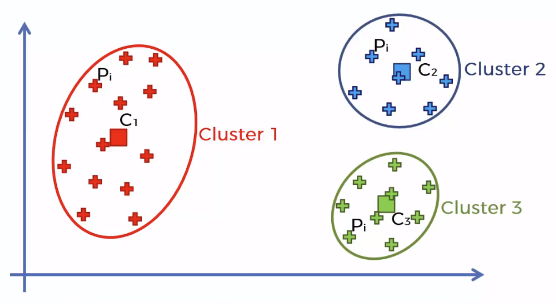

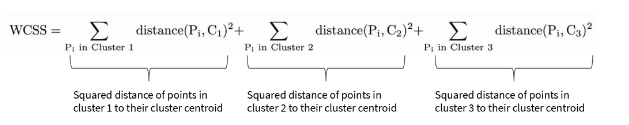

- Sum the squared distance (euclidean distance - sqrt of a² + b²) between each data points (Pi) and C1. And this the WCSS for cluster 1.
- Repeat the similar calculation for other clusters (C2, C3,...etc).
- If k = 3, there will be 3 WCSS calculations.
- Add (sum) up all WCSS of each clusters to arrive at the final WCSS.

### 6.1.4 Choosing the Optimal K value

- For a dataset with 10 data points, if k = 10, the distance between the points and its centroids will be 0. This means the WCSS = 0. In another words, each of the 10 data points have the same location as their centroids. However, this does not make sense, essentially no meaningful clusters can form in this manner. In fact, there is not a need to do clustering.

- As the value of k increases, the values of WCSS will decrease and the goal is to not have WCSS = 0.
- The goal is to find where is the largest and steepest drop in WCSS.

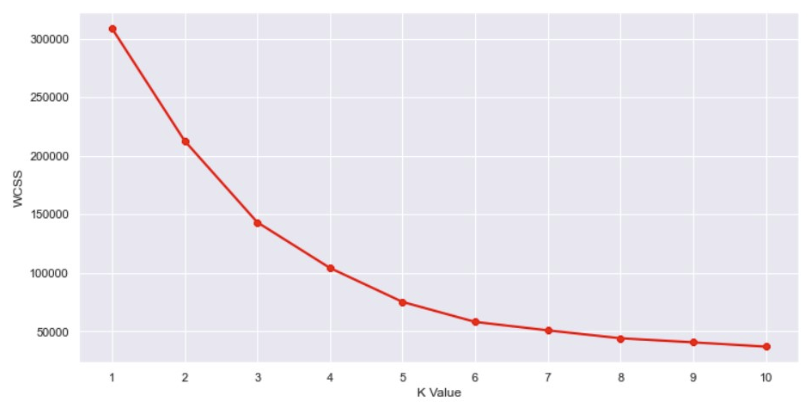

- WCSS always starts high, and as the k value increases, WCSS will decrease.
- From the graph above, we try to find the "elbow" (the point where the curve kink).
- At that kink point is where the optimal k value can be found. See the <b>elbow plot</b> below for a more exaggerate visualisation.

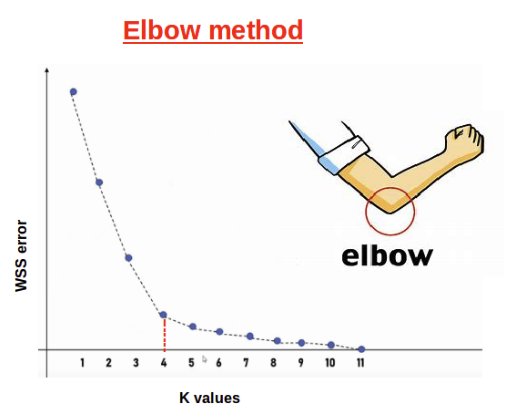

### 6.1.5 Implementation of K-means Clustering

Using some data of customers of a credit card company, we see an example of how k-means clutering can be implemented.

As a Data Scienctist in a Credit Card Company, you can be tasked to come up with a proposal on how to <b>segment customers</b> so that your marketing team can better focus their attention and cross-sell to the appropriate customers. Some basic information of the customers such as Customer ID, Age, Gender, Annual Income and Spending Score.

Spending Score is a feature you would assign to the customer based on your defined parameters like customer behavoir and purchasing data. A look at customer earning power and their spending power. With a higher earning power, naturally you would have higher spending power as well.

#### a. Read in the data. 

In [1]:
import pandas as pd
cc_cust_df = pd.read_csv("credit_card_customers.csv")
cc_cust_df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

#### b. Exploratory Data Analysis

Apply `.info()` and `.describe()` to have a broader understanding of the data

In [2]:
cc_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
cc_cust_df.describe().T

count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0

Visualisation of the dataset. Plot the distribution of income of each gender using plotly.express.

In [4]:
import plotly.express as px
age_income_fig = px.histogram(cc_cust_df,
                              x="Annual Income (k$)",
                              color="Gender",
                              title="Annual Income Distribution"
                             )

age_income_fig.show()

- In this dataset, there are more female than male

Visualisation of the dataset. Plot the distribution of age for each gender using plotly.express

In [5]:
age_gender_fig = px.histogram(cc_cust_df,
                              x="Age",
                              color="Gender",
                              title="Age Demography"
                             )

age_gender_fig.show()

- In this dataset, and across majority of all age groups, there are more female than male.

Visualisation of the dataset. Plot the spending score of each gender using plotly.express.

In [6]:
spend_score_fig = px.box(cc_cust_df,
                         x="Gender",
                         y="Spending Score (1-100)"
                        )

spend_score_fig.show()

In this dataset, we observe again that female has higher spending score than male.

#### c. Find Optimal Clusters

As earlier we have said before, K-means Clustering is a <b>distance-based algorithm</b>. The features to choose to focus on as recommendation should be numerical columns. For numerical columns, continous values works better. If the scale between the selected features spans in a large magnitute, then the features should be <b>scaled</b>. We can use the `.describe()` method to check out the standard deviation between the features. If they are quite similar, then feature scaling would not be necessary. However, in reality, feature scaling should always be done.

In this example, we have hypothesized that using <b>Spending Score</b> and <b>Annual Income</b> can produce good clusters. To generate clusters, we need a k value. And to choose a good k value, we use the <b>Elbow Plot</b> method to find out the optimal k value.

Perform feature scaling on the features we want to use.

In [7]:
# Z-score normalisation (x - mean)/std
# Goal: mean=0 & std=1

# x_scaled = (x - x_mean) / x_std

features_to_scale = ["Annual Income (k$)","Spending Score (1-100)"]

for col in features_to_scale:
    cc_cust_df[col] = (cc_cust_df[col] - cc_cust_df[col].mean()) / cc_cust_df[col].std()
    
cc_cust_df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19           -1.734646               -0.433713
1           2    Male   21           -1.734646                1.192711
2           3  Female   20           -1.696572               -1.711618
3           4  Female   23           -1.696572                1.037814
4           5  Female   31           -1.658498               -0.394989

Create a new data frame to hold <b>Spending Score</b> and <b>Annual Income</b> columns.

In [8]:
good_features_df = cc_cust_df[["Annual Income (k$)","Spending Score (1-100)"]]
good_features_df.head()

Annual Income (k$)  Spending Score (1-100)
0           -1.734646               -0.433713
1           -1.734646                1.192711
2           -1.696572               -1.711618
3           -1.696572                1.037814
4           -1.658498               -0.394989

When we want to work on our <b>Elbow Plot</b>, we know that there are 2 axis. The <b>y-axis</b> is the range for our clusters <b>WCSS</b> and the <b>x-axis</b> is where we hold the <b>k values</b>.

For k values, we know that it is a <b>range of k values</b> that we can set in our code. For WCSS, there is a function in sk learn called `KMeans()` which can be found in the `sklearn.cluster` module. [Click on this link to learn more](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

The `KMeans()` function takes on the following parameters.
- `n_clusters` - this is essentially our k values.
- `init` - this specifies the method we want to use to choose the first initial k centroids.
> - `init = "k-means++"` - intelligently selects initial cluster centers for K-means Clustering in a smart way to speed up convergence. Selects the first centroids based on how sense the data points are.
> - `init = "random"` - simply starts off with randomly chosen centroids.

In [9]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10+1): # iterates k = 1 all the way to k = 10
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model = kmeans_model.fit(good_features_df) # learn where the clusters are based on the features
    wcss.append(kmeans_model.inertia_) # append each wcss of fitting k=i model
    
print(kmeans_model)
print("\n","WCSS for each iteration: ",wcss)
print("\n",kmeans_model.labels_)

KMeans(n_clusters=10, random_state=0)

 WCSS for each iteration:  [398.0, 267.67170978032124, 156.9154881096077, 108.37671003057535, 65.24056611493822, 54.782061529034074, 44.68662962224021, 36.995849037687215, 32.21337741317496, 28.93079596698805]

 [2 3 6 3 2 3 6 3 6 3 6 3 6 3 6 3 2 3 2 3 2 3 6 3 6 3 2 3 2 3 6 3 6 3 6 3 6
 3 2 3 2 3 2 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 0 5 5 0 0 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 8 0 1 4 8 4 8 0 8 4 1 4 8 4 8 4 1 0 1 4 1 0 8
 4 1 4 1 4 8 4 1 4 8 4 8 0 1 4 1 4 8 4 1 4 8 4 8 4 1 4 1 4 8 4 1 7 1 7 1 7
 1 7 9 7 9 7 9 7 9 7 9 7 9 7 9]


Using the list of `wcss` for each k value, we can generate a line plot for our <b>Elbow Plot</b>.

In [10]:
elbow_plot = px.line(x=range(1,10+1),
                     y=wcss,
                     title="The Elbow Plot",
                     labels={"x":"No of Clusters", "y":"WCSS"},
                     markers=True
                    )

elbow_plot.show()

- Through the elbow plot, we can see 2 kinks in along the curve. k = 5 seems to have "more kink".

#### d. Generate Clusters and Visualisating it.

With the optimal k value decided, next we generate a k means cluster with the optimal k value.

In [11]:
kmeans_model = KMeans(n_clusters=5, random_state=0)
y_means = kmeans_model.fit_predict(good_features_df)
print(y_means)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Append the labels to the original dataframe

In [12]:
cc_cust_df["Clusters"] = y_means.astype(str) # convert y_means (in int data type, to object data typebb)
cc_cust_df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19           -1.734646               -0.433713   
1           2    Male   21           -1.734646                1.192711   
2           3  Female   20           -1.696572               -1.711618   
3           4  Female   23           -1.696572                1.037814   
4           5  Female   31           -1.658498               -0.394989   

  Clusters  
0        4  
1        3  
2        4  
3        3  
4        4

We can also see the coordinates of our cluster centroids using `.cluster_centers_`.

In [13]:
clusters_centroids = kmeans_model.cluster_centers_
clusters_centroids

array([[ 1.05236221, -1.28122394],
       [-0.20040965, -0.02638995],
       [ 0.98910098,  1.23640011],
       [-1.32621729,  1.12934389],
       [-1.3042458 , -1.13411939]])

The output can be read as coordinate for the centroids in such a way [Annual Income (k$), Spending Score (1-100)].

In [14]:
import plotly.graph_objects as go

clusters_plot = px.scatter(cc_cust_df,
                           x="Annual Income (k$)",
                           y="Spending Score (1-100)",
                           color="Clusters",
                           title="Customer Segmentation"
                          )

clusters_plot.add_trace(go.Scatter(x=clusters_centroids[:,0], # all rows, but value at index 0
                                   y=clusters_centroids[:,1], # all rows, but value at index 1b
                                   mode="markers",
                                   name="Centroid",
                                   marker_color="rgba(0,0,0,1)"
                                  )
                       )

The clusters are now clearly defined in the plot. However, it is still difficult to make sense what does each clusters represent.

To make the clusters more intuitive, We assigned each cluster labels, which are now in numbers, a meaning or a name (a phrase that is representative of the cluster)

After some studying of the data, we can name the clusters as such":
- Miser
- Middle Income
- High Rollers
- Spendthrift
- Low Income

Define a function which change the clusters label from number to their names.

In [15]:
def change_cluster_label(label):
    
    if label == "4":
        return "Low Income"
    
    elif label == "3":
        return "Spendthrift"
    
    elif label == "2":
        return "High Rollers"
    
    elif label == "1":
        return "Middle Income"
    
    else:
        return "Miser"
    
cc_cust_df["Clusters"] = cc_cust_df["Clusters"].apply(change_cluster_label)
cc_cust_df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19           -1.734646               -0.433713   
1           2    Male   21           -1.734646                1.192711   
2           3  Female   20           -1.696572               -1.711618   
3           4  Female   23           -1.696572                1.037814   
4           5  Female   31           -1.658498               -0.394989   

      Clusters  
0   Low Income  
1  Spendthrift  
2   Low Income  
3  Spendthrift  
4   Low Income

Replot the cluster plot again.

In [16]:
clusters_plot = px.scatter(cc_cust_df,
                           x="Annual Income (k$)",
                           y="Spending Score (1-100)",
                           color="Clusters",
                           title="Customer Segmentation"
                          )

clusters_plot.add_trace(go.Scatter(x=clusters_centroids[:,0], # all rows, but value at index 0
                                   y=clusters_centroids[:,1], # all rows, but value at index 1b
                                   mode="markers",
                                   name="Centroid",
                                   marker_color="rgba(0,0,0,1)"
                                  )
                       )

## 6.2 Hierarchical Clustering

This clustering method is also known as agglomerative clustering which also seeks to build a hierarchical of clusters. Think of it as building clusters from bottom to top. Hierarchical clustering is a distance-based algorithm.

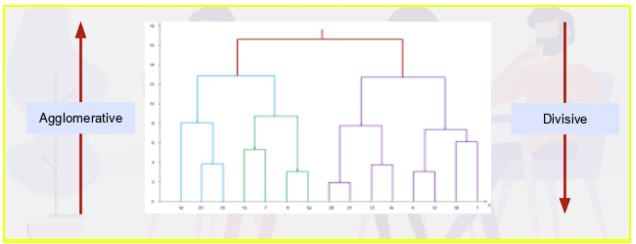

### 6.2.1 Concepts of Hierarchical Clustering

The intuitive and concepts of hierarchical clustering are as such:
1. Each point is a cluster on its own.
2. The 2 closet points form a cluster.
3. Take 2 closest clusters to form 1 cluster.
4. Repeat step 3 until 1 final cluster is formed.

#### 1. Each point is a cluster on its own.

In the beginning, we have 9 data points and they are a cluster on its own. So, we have 9 clusters initially.

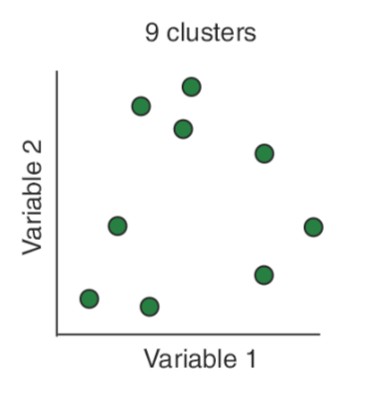

#### 2. The 2 closet points form a cluster.

Look for the 2 nearest point and group them together, now we have 8 clusters. This process continues, the cluster formed look for the next nearest point and to group them together - down to 7 clusters.

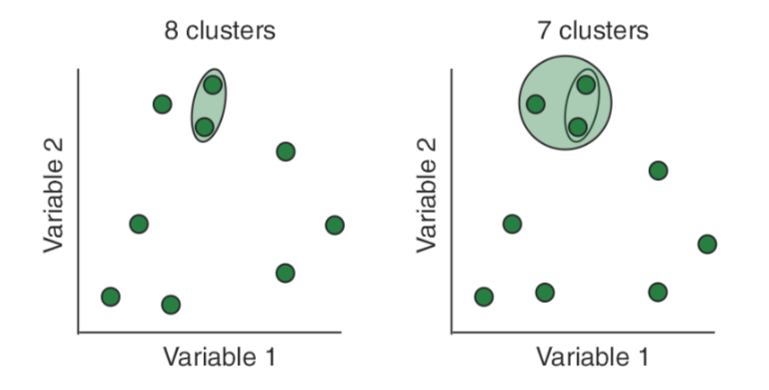

The process of step 2 continues similary for other data points and the number of clusters keep decreasing.

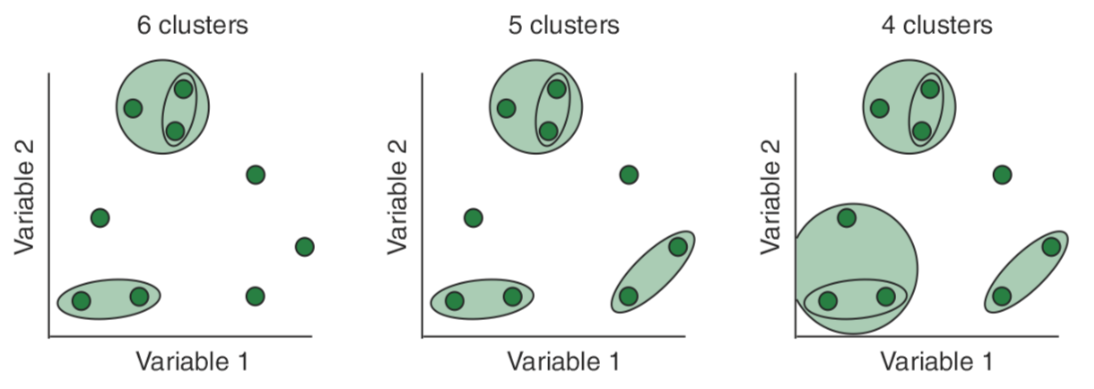

#### 3. Take 2 closest clusters to form 1 cluster.

The algorithm contiues to run and small clusters will beginning to look for each other to form a larger cluster.

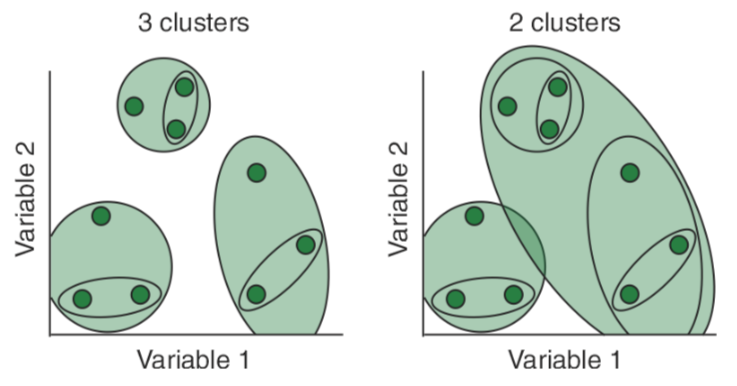

#### 4. Repeat step 3 until 1 final cluster is formed.

Step 3 repeats itself till only 1 cluster is left and the algorithm stops running.

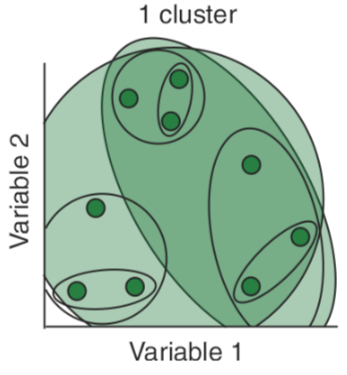

### 6.2.2 How Does Hierarchical Clustering Measure Distance?
As we know, hierarchical clustering is a distance-based algorithm. We look at how far apart are the data points and clusters. The deterministic factor of this is by measuring the distance between data points or clusters (feature scaling is required). 

We make use of euclidean distance and we calculate this distance between them. The 2 shortest distance between data points will form a cluster.

But, one thing is still unknown and that is the question - how we do calculate the euclidean distance between data points or clusters?

Turns out, there are a few methods of such distance measurement and they are known as linkage.
1. Simple Linkage.
2. Complete Linkage.
3. Average Linkage.
4. Ward Linkage.
5. Centroid Linkage.

#### Simple Linkage

Distance of 2 clusters is defined by the <b>minimum distance</b> between the data point in one cluster and data point in another cluster. Then, they merge together in each step.

Simple Linkage algorithm takes a longer time to compute (comparing the minimum distances of the data points between clusters). It is also sensitive to outliers and noise.

However, Simple Linkage is good at handling clusters of different and odd sizes.

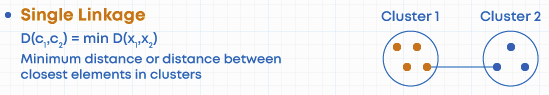

#### Complete Linkage

Distance of 2 clusters is defined by the <b>maximum distance</b> between data point in one cluster and data point in another cluster. Then, they merge together in each step.

Complete Linkage tends to break large clusters and it is biased towards globular clusters. It also takes a longer time to compute (comparing the maximum distance of the data points between clusters).

However, Complete Linkage works better and it does well in separating cluster when there are outliers and noise between clusters.

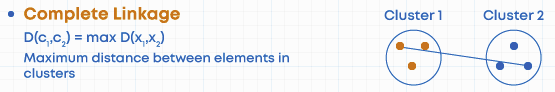

#### Average Linkage

Distance of 2 clusters is defined by the <b>average distance</b> distance between data point in one cluster and data point in another cluster, Then, they are merge together in each step.

Average Linkage takes a shorter time to compute (no comparing of min or max distance between clusters) and it does well in separating clusters when there are outliers and noise between clusters.

However, Average Linkage is biased towards globular clusters.

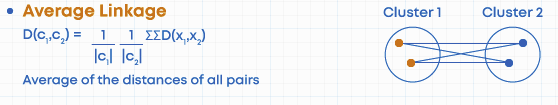

#### Ward Linkage

Ward Linkage finds the <b>similarity</b> of 2 clusters and merge them together. This method computes and concludes the the <b>lowest WCSS amongst the many 2 clusters</b> and merge them together in each step. It tries to merge clusters and data points that leads to the least increase in total number of deviation with the centroid.

Ward Linkage is the preferred method as it produces better cluster hierarchies and it works better when there are outliers and noise. Unlike other methods like Simple Linkage where the clusters formed are more oblong, Ward Linakge form clusters differently based on WCSS.

However, Ward Linkage is biased towards globular clusters.

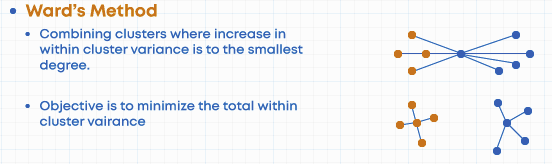

#### Centroid Linkage

Distance of 2 clusters is defined by the distance between the <b>2 mean vectors</b> of the clusters. This method computes and concludes the <b>shortest distance between the centroids</b> amongst the many 2 clusters and merge them together in each step.

Centroid Linkage does well when there are outliers and noise between the clusters.

However, Centroid Linkage is biased towards globular clusters.

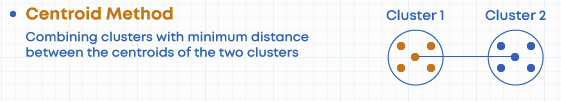

### 6.2.3 Choosing the Optimal K Value

As we have seen in K-means Clustering method, we determine the k value at the beginning. For Hierarchical Clustering method, the beauty of it comes from the algorithm. It gives the clustering output and the process itself shows how our clusters are formed and structured.

A popular solution goes by inspecting the Dendrogram produced using the hierarchical clustering algorithm to see if it suggests a particular number of clusters.

#### Dendrogram

A dendrgram is a visualisation technique for heirarchical clustering. Its main objective is for us to analysis the output and make a decision on the optimal number of clusters. By drawing a horizontal line across the dendrogram, we can determine the number of cluster by the number of intersections between the horizontal and vertical lines.

We start off with 6 points in our data set and go through the clustering process.

The x-axis represents all the data points in our dataset.

The y-axis represents the euclidean distance of the data points (dissimilar distance).

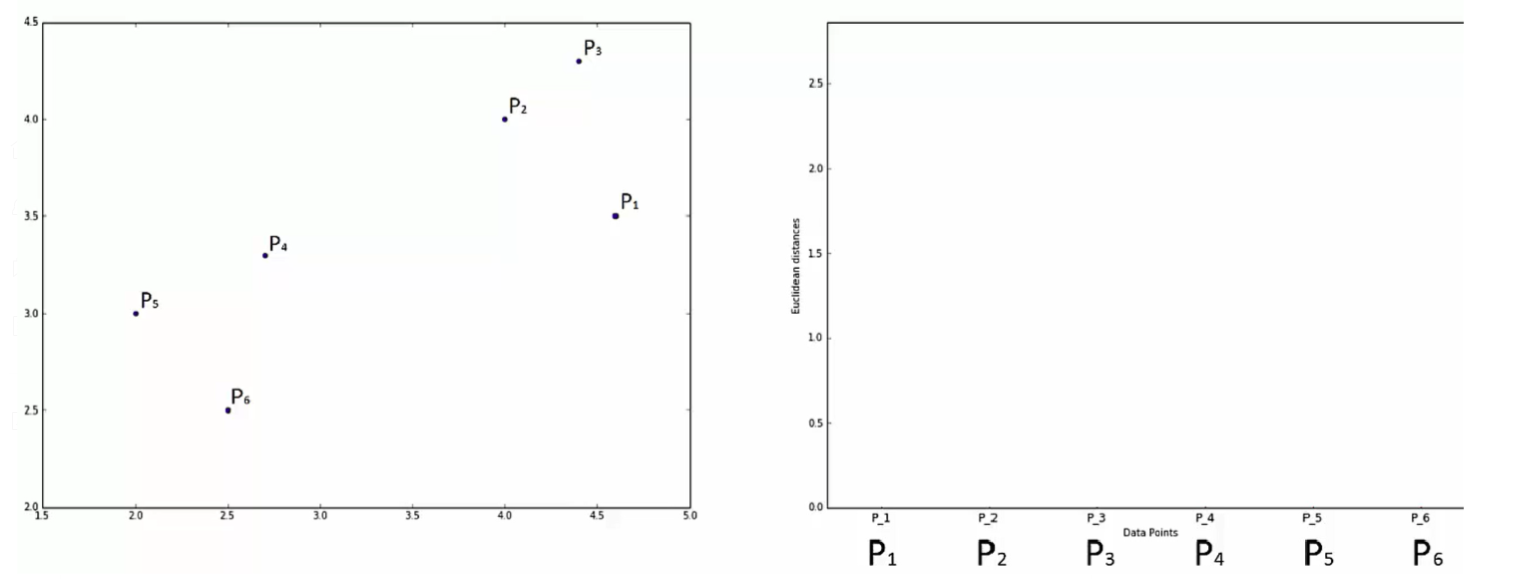

Consider P2 and P3 and by euclidean distance they are the cloest points. We make them a cluster and plot the dendrogram as seen below.

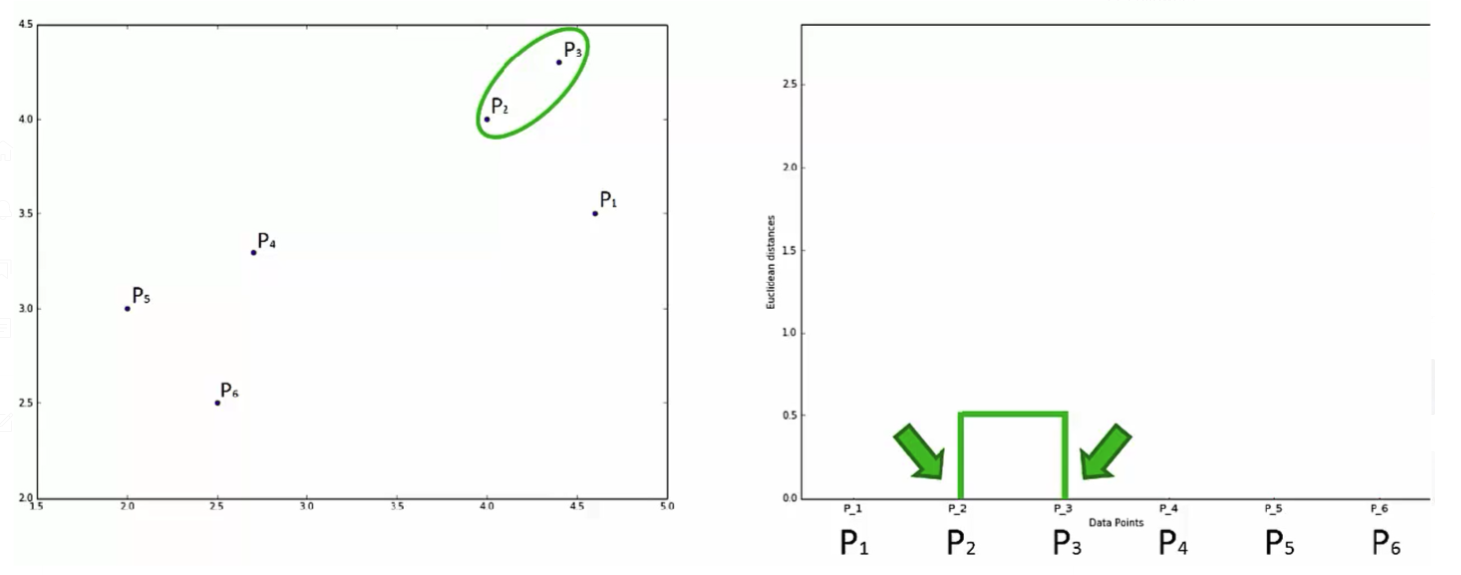

The steps are repeated for other data points. Now, P5 and P6 are the closest data points. They form a cluster and the dendrogram is plotted again.

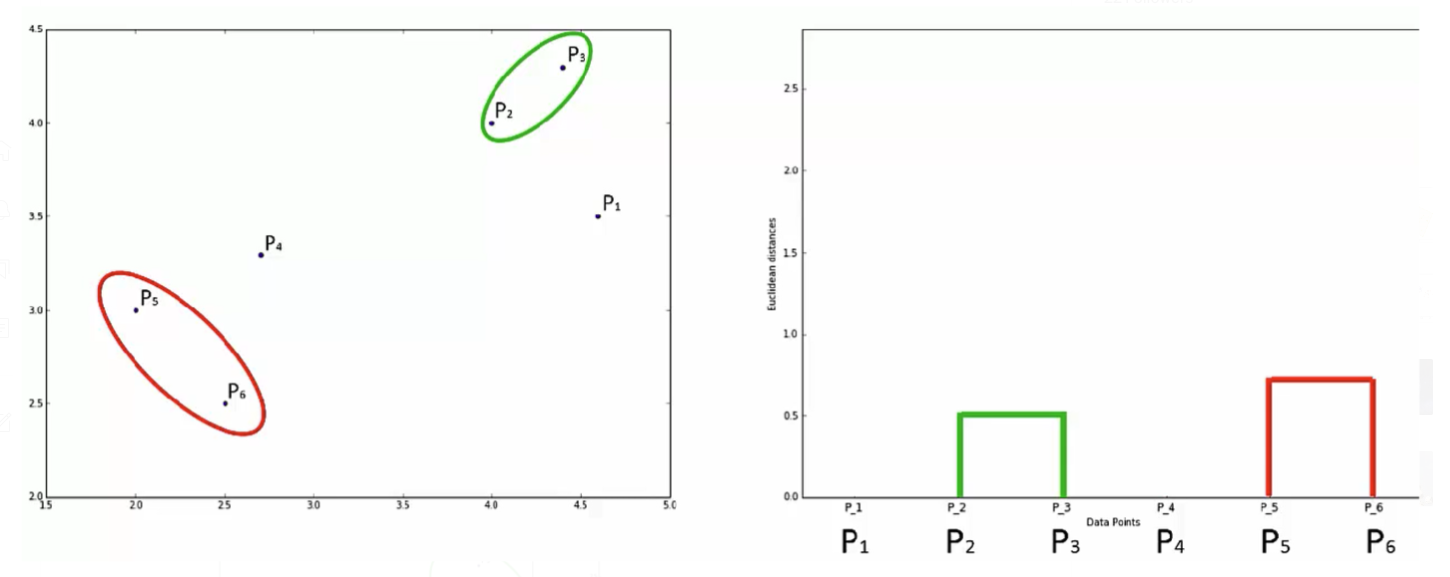

Now we see that P2 and P3 is a cluster, and P1 is closest to them. They all form a cluster again, and the dendrogram is plotted again. Notice that there is a horizontal line for P1, P2 and P3 indicating they are a cluster by themselves.

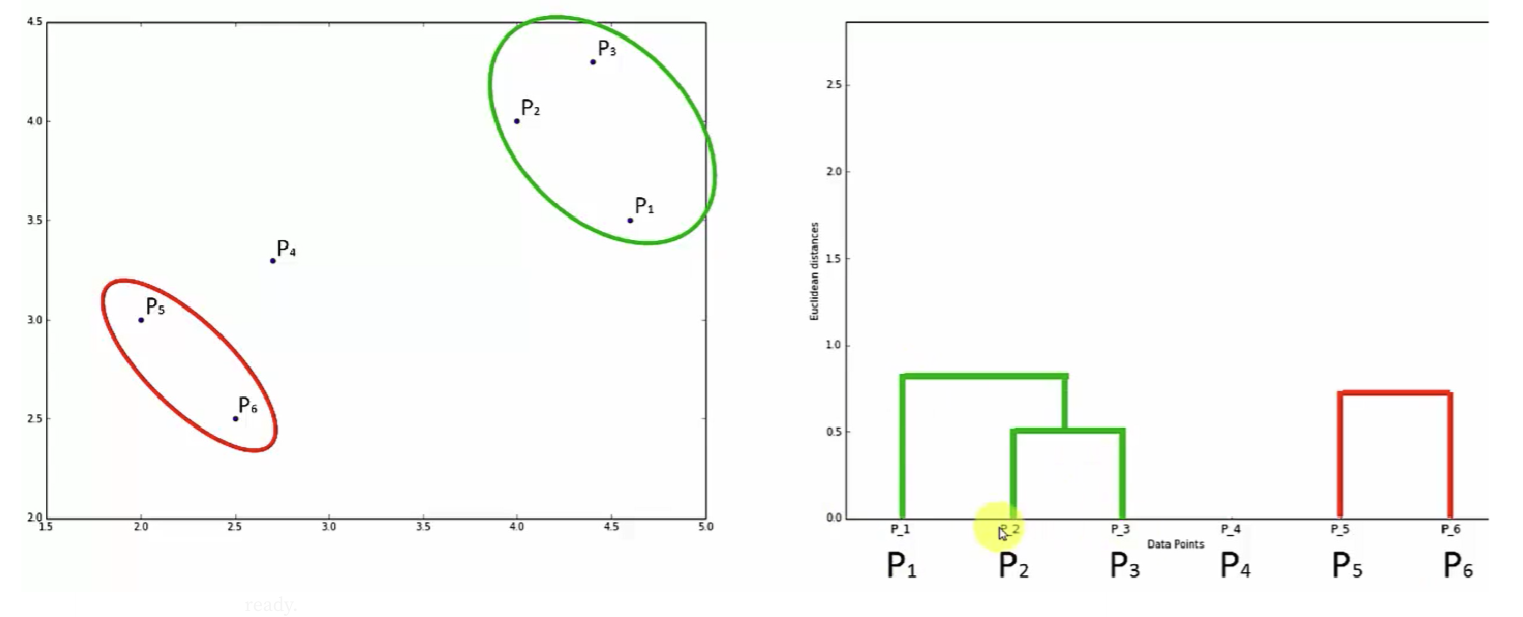

Similarly with P5 and P6, P4 is closest to them. So they form a cluster and the dendrogram plots itself. In this phase, we have a total of 2 clusters.

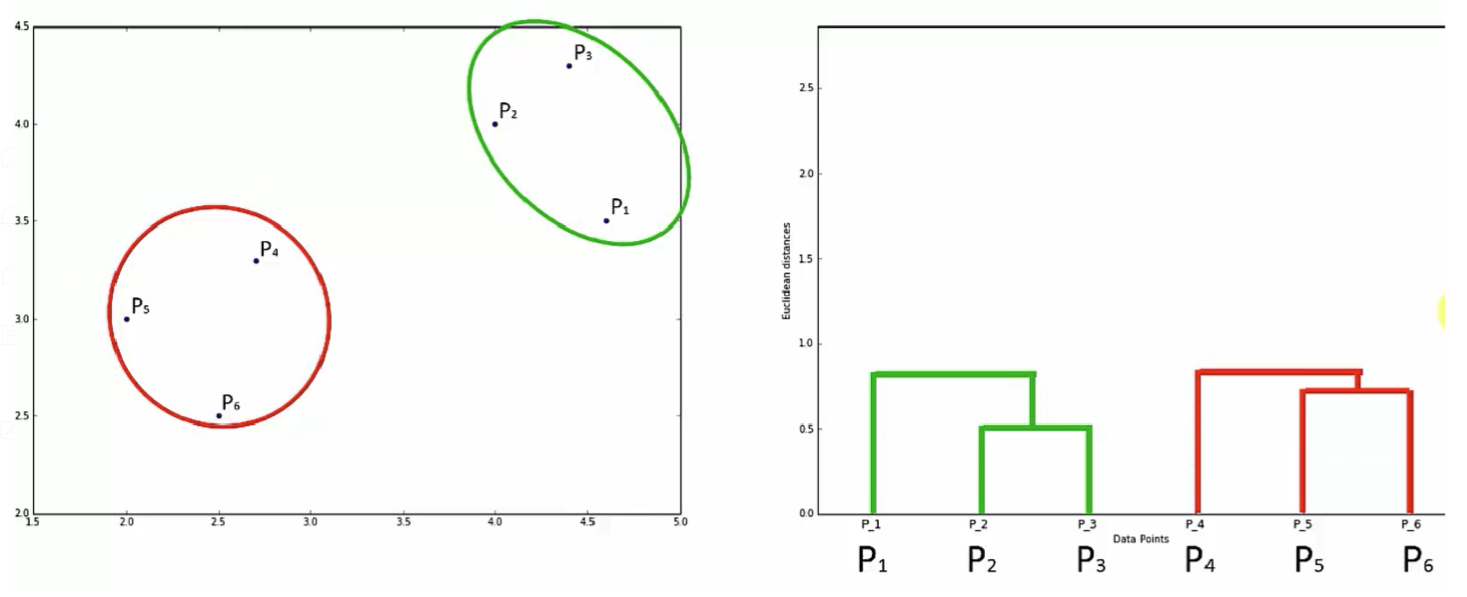

Finally, we combine the 2 clusters into a single cluster. This means that the dendrogram is completed and the algorithm has finish computing.

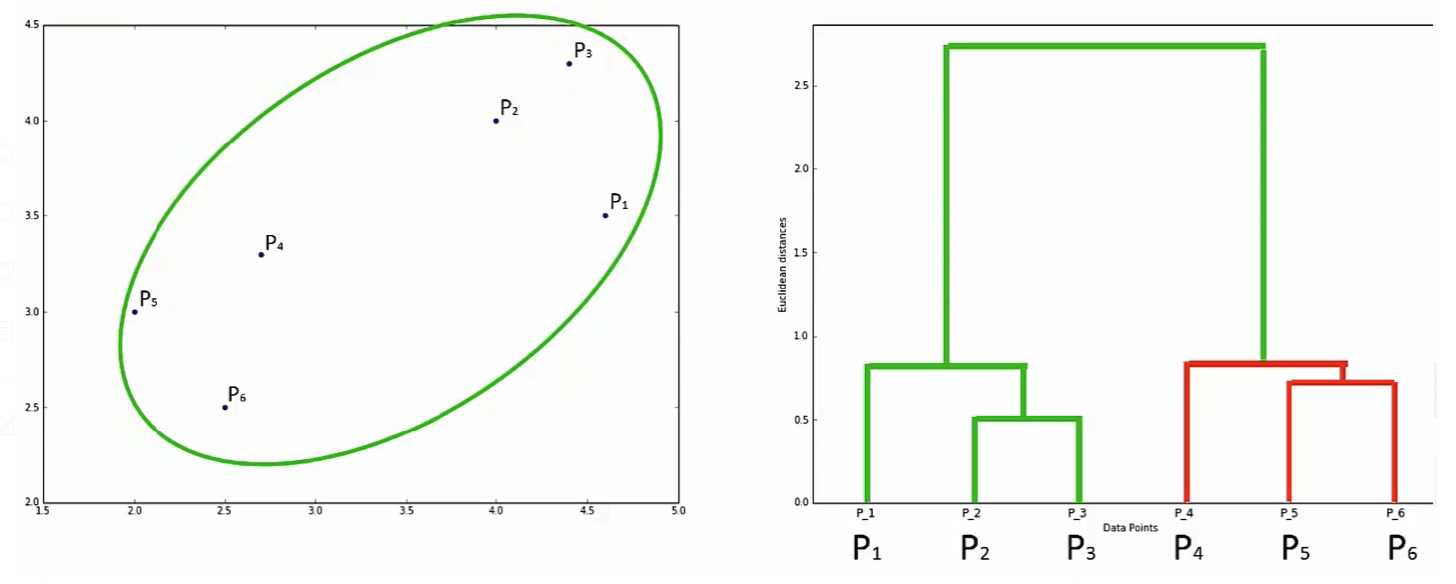

To determine the number of clusters, we draw a horizontal line across the dendrogram. In the below example, there derive 2 clusters.

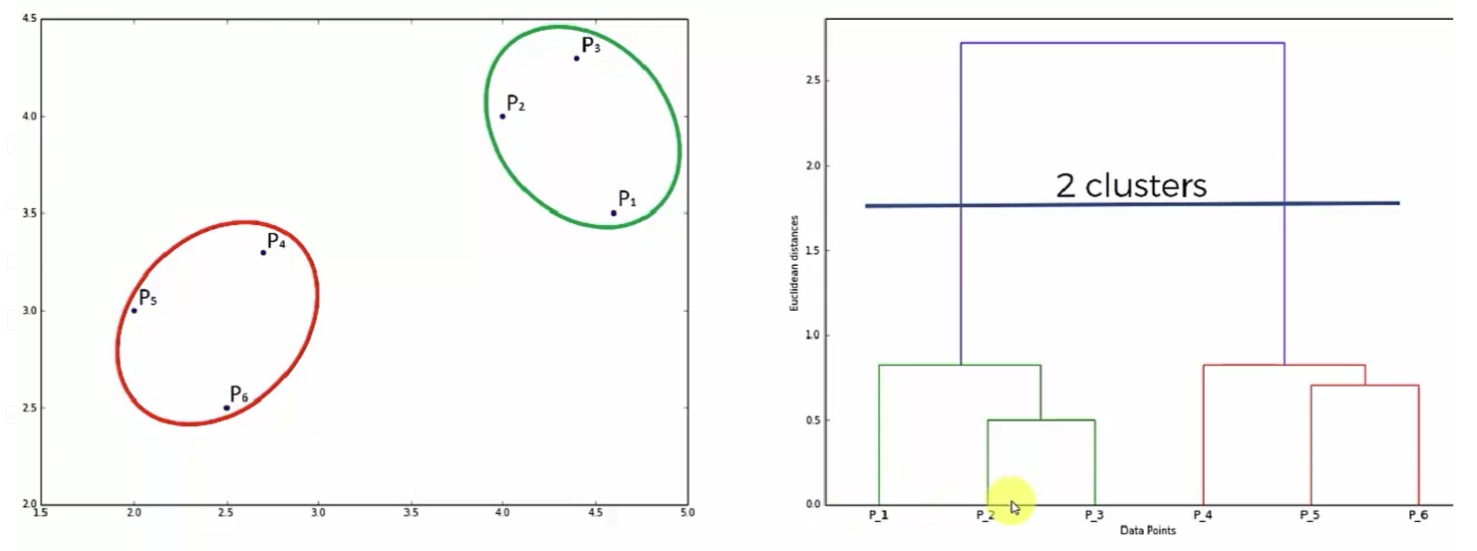

If we set the threshold that we do not allow dissimilar distance of above 0.8, we draw the line across as seen in the example below. Resulting in 4 clusters.

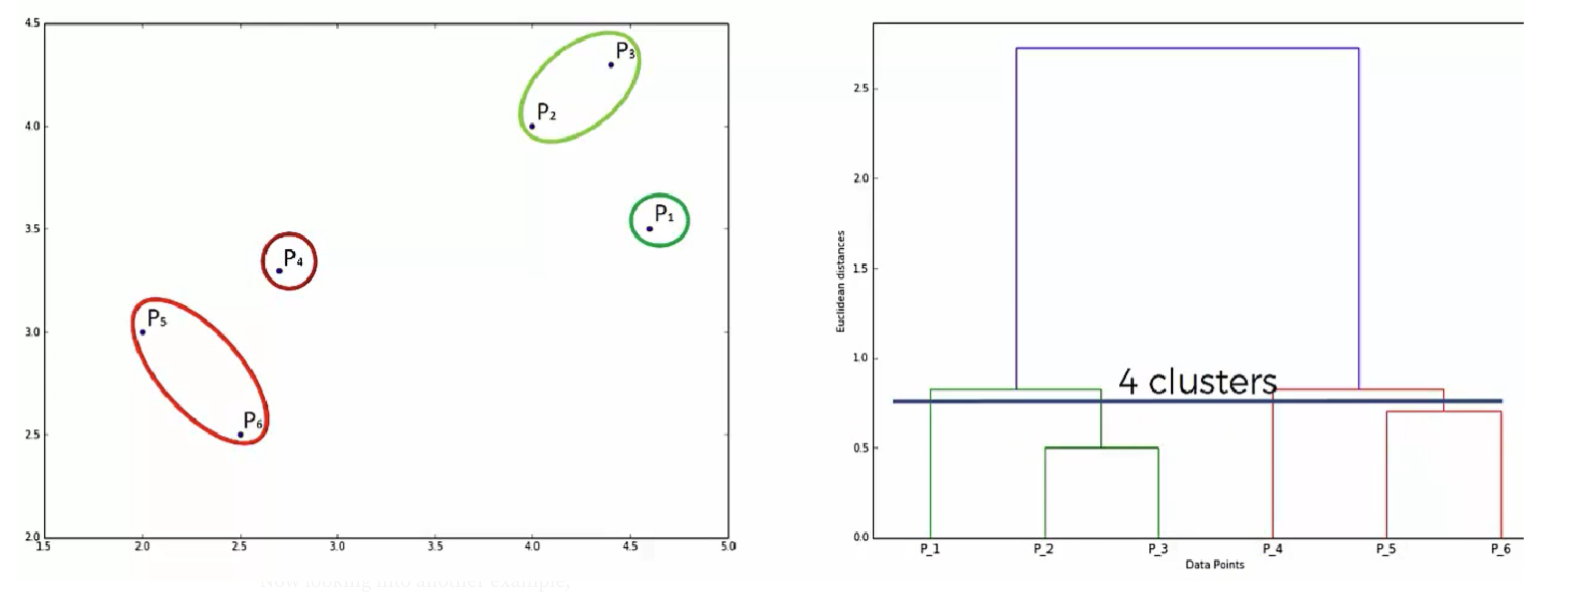

Note that the threshold is decided where there is a very large distance (along the vertical line). This means that, for a very long time the algorithm is computing but there is no merging of clusters.

In another example below, it shows where the horizontal distance is draw acorss. It is when after 3 clusters are formed, there is a large distance before (P4, P5, P6) and (P7, P8, P9) forms a cluster.

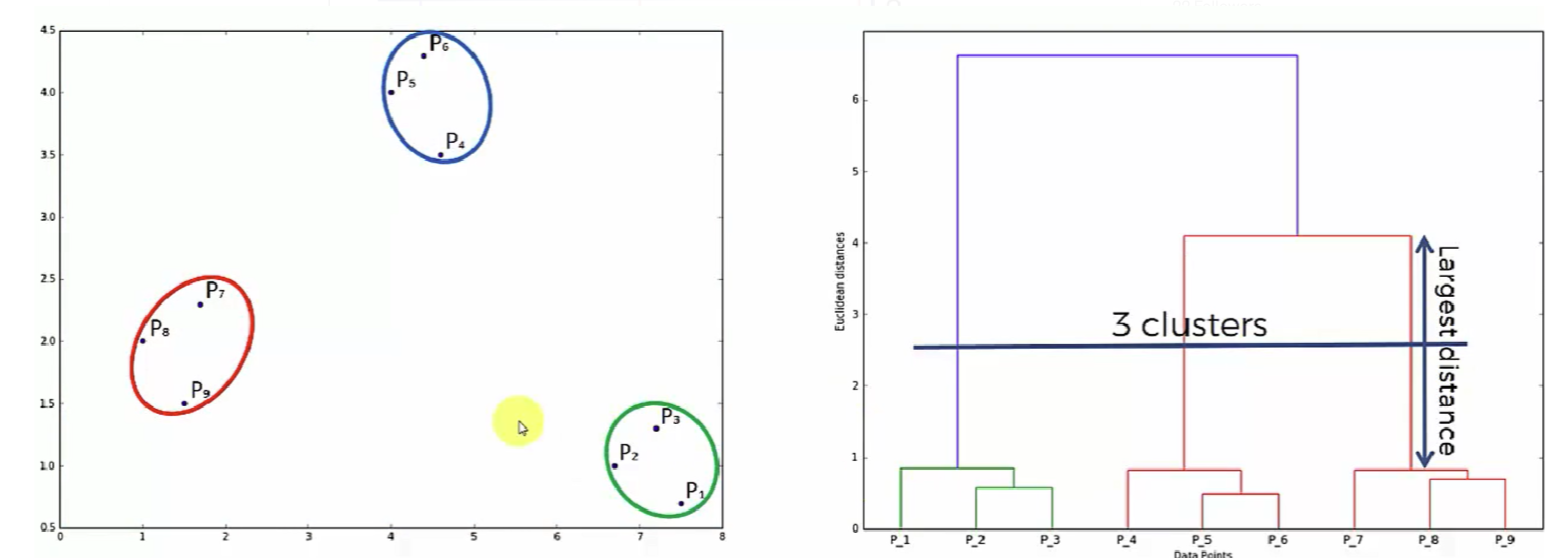

### 6.2.4 Implementation of Hierarchical Clustering

The typical procedures of a hierarchical clustering study is as follows:
1. Read Data.
2. Exploratory Data Analysis.
3. Find Optimal Cluster using Dendrograms
4. Generate Clusters & Visualising It.

#### 1. Read Data

In [17]:
import pandas as pd
cc_cust_df = pd.read_csv("credit_card_customers.csv")
cc_cust_df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

#### 2. Exploratory Data Analysis

In [18]:
cc_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
cc_cust_df.describe().T

count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0

Not forgetting to scale the features first.

In [20]:
features = cc_cust_df[["Annual Income (k$)","Spending Score (1-100)"]]

for col in features:
    cc_cust_df[col] = (cc_cust_df[col] - cc_cust_df[col].mean()) / cc_cust_df[col].std()
    
cc_cust_df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19           -1.734646               -0.433713
1             2    Male   21           -1.734646                1.192711
2             3  Female   20           -1.696572               -1.711618
3             4  Female   23           -1.696572                1.037814
4             5  Female   31           -1.658498               -0.394989
..          ...     ...  ...                 ...                     ...
195         196  Female   35            2.263112                1.115262
196         197  Female   45            2.491555               -0.859681
197         198    Male   32            2.491555                0.921640
198         199    Male   32            2.910368               -1.246925
199         200    Male   30            2.910368                1.270160

[200 rows x 5 columns]

#### 3. Find Optimal Cluster using Dendrograms

Similarly to K-means Clustering, we hypothesized that using Spending Score and Annual Income can produce good clusters. Before we can produce clusters, we need to know the optimal number of clusters. By using Dendrogram, we visualise how can this be done.

In [21]:
features = cc_cust_df[["Annual Income (k$)","Spending Score (1-100)"]]
features.head()

Annual Income (k$)  Spending Score (1-100)
0           -1.734646               -0.433713
1           -1.734646                1.192711
2           -1.696572               -1.711618
3           -1.696572                1.037814
4           -1.658498               -0.394989

In [22]:
import plotly.figure_factory as ff

features_dendrogram = ff.create_dendrogram(features)
features_dendrogram.update_layout(width=1000, height=500)
features_dendrogram.show()

Let's say we want to cut acorss the dendrogram with a threshold of not more than 2.7 on the y-axis. We will have 5 clusters and this is our optimal number of clusters.

#### 4. Generate Clusters & Visualising It.

With the optimal number of clusters decided, we can generate a heirarchical clustering with it. In sk-learn, there is a function caled `AgglomerativeClustering()` with the following parameters:
- `n_clusters` - this specifies the number of clusters
- `affinity` - specifies the method used to measure the distance between data points (euclidean, l1, l2, etc.)
- `linkage` - specifies the rule on how to form clusters

In [23]:
from sklearn.cluster import AgglomerativeClustering

hier_cluster_model = AgglomerativeClustering(n_clusters=5)
hier_cluster_labels = hier_cluster_model.fit_predict(features)
hier_cluster_labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

Append the labels to the original dataframe

In [24]:
cc_cust_df["Clusters"] = hier_cluster_labels.astype(str)
cc_cust_df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19           -1.734646               -0.433713   
1           2    Male   21           -1.734646                1.192711   
2           3  Female   20           -1.696572               -1.711618   
3           4  Female   23           -1.696572                1.037814   
4           5  Female   31           -1.658498               -0.394989   

  Clusters  
0        4  
1        3  
2        4  
3        3  
4        4

Plot the output of the clustering algorithm using the `scatter()` from plotly

In [25]:
import plotly.express as px

clusters_plot = px.scatter(cc_cust_df,
                           x="Annual Income (k$)",
                           y="Spending Score (1-100)",
                           color="Clusters"
                          )


clusters_plot.show()

We do some study on the clusters and label them according to their spending behavoir.

In [26]:
cc_cust_df[cc_cust_df["Clusters"] == "2"].describe().T

count       mean        std        min        25%  \
CustomerID               85.0  87.894118  26.542878  44.000000  66.000000   
Age                      85.0  42.482353  16.395856  18.000000  27.000000   
Annual Income (k$)       85.0  -0.180784   0.370516  -0.820873  -0.478208   
Spending Score (1-100)   85.0  -0.041458   0.281968  -0.820957  -0.278816   

                              50%         75%         max  
CustomerID              87.000000  108.000000  161.000000  
Age                     46.000000   54.000000   70.000000  
Annual Income (k$)      -0.135543    0.092900    0.702082  
Spending Score (1-100)  -0.046469    0.185877    0.573121

Assigning each cluster a label to give them meaning.

In [27]:
def change_cluster_label(label):
    
    if label == "4":
        return "Low Income"
    
    elif label == "3":
        return "Spendthrift"
    
    elif label == "2":
        return "Middle Income"
    
    elif label == "1":
        return "High Rollers"
    
    else:
        return "Miser"
    
cc_cust_df["Clusters"] = cc_cust_df["Clusters"].apply(change_cluster_label)
cc_cust_df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19           -1.734646               -0.433713   
1           2    Male   21           -1.734646                1.192711   
2           3  Female   20           -1.696572               -1.711618   
3           4  Female   23           -1.696572                1.037814   
4           5  Female   31           -1.658498               -0.394989   

      Clusters  
0   Low Income  
1  Spendthrift  
2   Low Income  
3  Spendthrift  
4   Low Income

In [28]:
clusters_plot = px.scatter(cc_cust_df,
                           x="Annual Income (k$)",
                           y="Spending Score (1-100)",
                           color="Clusters",
                           title="Customer Segmentation"
                          )

clusters_plot.show()

## 6.3 Density-based Clustering

Also famously known as Density-based Spatial Clustering of Applications with Noise (DBSCAN). This clustering method identifies areas where points are concentrated and points that are located in empty or sparse areas. When this algorithm completes, some points will be left out and not clustered and these points are considered as noise. 

The advantage of this method over K-means and Hierarchical clustering is that Density-based Clustering has the ability to discover clusters of differnt shapes and sizes from a large amount of data, easily identifying noise and outliers. This makes Density-based Clustering very useful in application such as abnormally detection.

The DBSCAN alogirthm has two parameters:
1. minPts: Minimum number of points (the threshold) for a region to be considered dense, thereby forming a cluster.
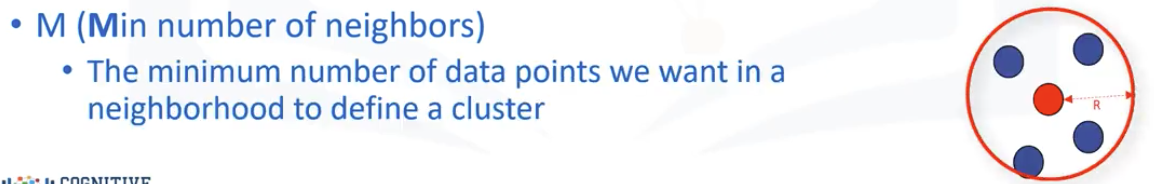

2. eps(ε): A distance (radius) measure that will be used to locate the poitns in the neighborhood of any point.
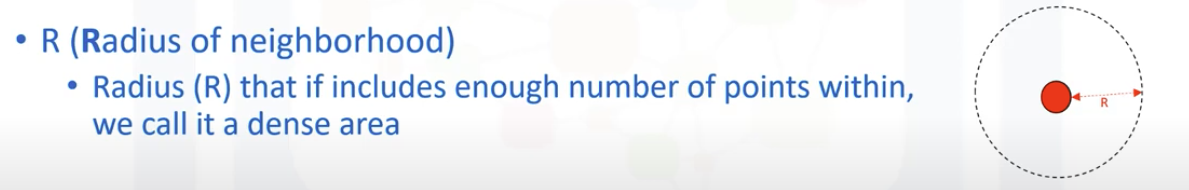

### 6.3.1 Concepts of Density-based Clustering

The intuitive and concepts of density-based clustering are as such:
1. 1 random point is selected as the starting point.
2. From there, generate a cluster.
3. Grow the cluster.
4. Finalise the cluser.
5. Repeat steps 1 to 4.

#### 1. 1 random point is selected as the starting point.

The <b>starting point</b> is a data point randomly selected. Here, our starting point is the green circle.
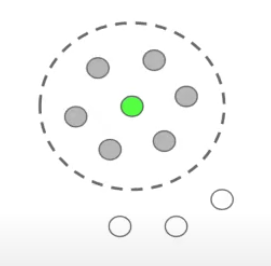

#### 2. From there, generate a cluster.

<b>Core points</b> are points that fall within the eps distance of the starting point. In our illustration, there are 6 gray circles which are the core points.

If the minPts is the minimum number of core points, including starting point, is set to 7. Then the first cluster is formed (1 starting point + 6 core points). This concludes the first iteration.

If the minPts is set to 8 or above, a cluster will not be formed.

#### 3. Grow the cluster.

Now, each member of the first cluster broadcast out its perimeter by the same eps distance. Any other points that fall wiithin the perimeter will be part of the cluster.

3 new data points are found and they are called border points. Border points cannot directly reach the starting point, but they can be chained together to reach the starting point indirectly. The minPts criterion will not be required in this step since the first cluster has already met the requirement.

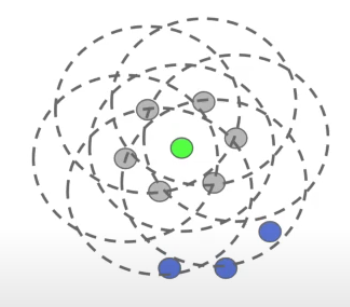

The 3 new data points then again broadcast out their perimeter by the same eps distance to find more new members. In this case, they did not find any.
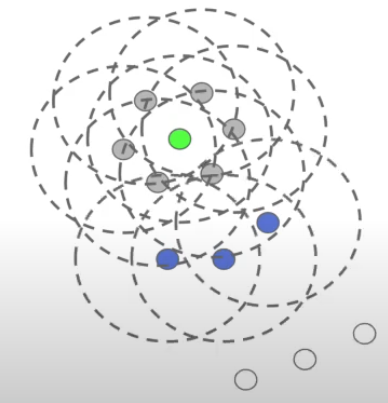

#### 4. Finalise the cluser.

When no more data points can be found, the first cluster in finalized. All blue points now represent the first and completed cluster. 

The white points represent unclustered points.
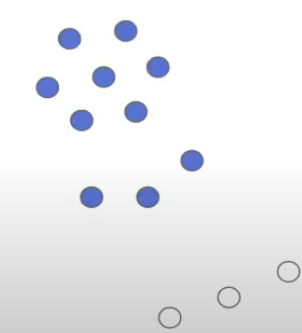

#### 5. Repeat steps 1 to 4.

The process restarts itself on a random point again as the new starting point from the reminaing unclustered points. The green circle represents the new starting point and any circles within its eps distance will form a cluster.
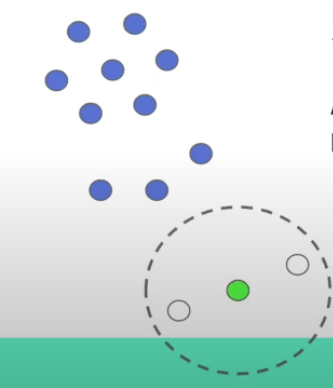

When the clustering algorithm complete, multiple clusters are formed. Here we have 2 clusters. The red cluster will only form if the minPts is set to 3. Else they would be considered as noise not belonging to any cluster.
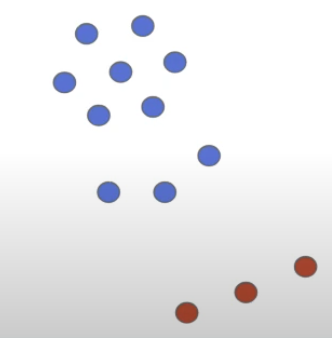